In [57]:
# importing the needed libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # for features scaling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [58]:
# loading the dataset
data = pd.read_csv('housing.csv') # reading the dataset

In [59]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [60]:
# dropping the NaN values
data.dropna(inplace = True)

In [61]:
# scaling features : (total_rooms, total_bedrooms, population, household) using Min-Max scaler
columns_to_scale = ['total_rooms', 'total_bedrooms', 'population', 'households']
scaler = MinMaxScaler() # creating the Min-Max scaler
scaled_features = pd.DataFrame(scaler.fit_transform(data[columns_to_scale]), columns=[col for col in columns_to_scale])
scaled_features.head()  # show the scaled features

,total_rooms,total_bedrooms,population,households
0,0.022331,0.019863,0.008941,0.020556
1,0.180503,0.171477,0.067210,0.186976
2,0.037260,0.029330,0.013818,0.028943
3,0.032352,0.036313,0.015555,0.035849
4,0.041330,0.043296,0.015752,0.042427


In [62]:
# dropping the unscaled features from the dataset
data.drop('total_rooms', axis=1, inplace=True)
data.drop('total_bedrooms', axis=1, inplace=True)
data.drop('population', axis=1, inplace=True)
data.drop('households', axis=1, inplace=True)
data.drop('ocean_proximity', axis=1, inplace=True)

data

,longitude,latitude,housing_median_age,median_income,median_house_value
0,-122.23,37.88,41,8.3252,452600
1,-122.22,37.86,21,8.3014,358500
2,-122.24,37.85,52,7.2574,352100
3,-122.25,37.85,52,5.6431,341300
4,-122.25,37.85,52,3.8462,342200
...,...,...,...,...,...
20635,-121.09,39.48,25,1.5603,78100
20636,-121.21,39.49,18,2.5568,77100
20637,-121.22,39.43,17,1.7000,92300
20638,-121.32,39.43,18,1.8672,84700


In [63]:
# concatinating scaled features with the dataset
final_data = pd.concat([data, scaled_features], axis=1)
final_data.dropna(inplace = True) # dropping NaN values
final_data

,longitude,latitude,housing_median_age,median_income,median_house_value,total_rooms,total_bedrooms,population,households
0,-122.23,37.88,41.0,8.3252,452600.0,0.022331,0.019863,0.008941,0.020556
1,-122.22,37.86,21.0,8.3014,358500.0,0.180503,0.171477,0.067210,0.186976
2,-122.24,37.85,52.0,7.2574,352100.0,0.037260,0.029330,0.013818,0.028943
3,-122.25,37.85,52.0,5.6431,341300.0,0.032352,0.036313,0.015555,0.035849
4,-122.25,37.85,52.0,3.8462,342200.0,0.041330,0.043296,0.015752,0.042427
...,...,...,...,...,...,...,...,...,...
20428,-118.83,34.23,6.0,8.7288,425800.0,0.042296,0.057883,0.023599,0.054103
20429,-118.84,34.22,11.0,7.5118,361900.0,0.017676,0.023122,0.009894,0.018582
20430,-118.84,34.21,16.0,5.2361,224700.0,0.057277,0.075109,0.028140,0.071041
20431,-118.80,34.21,16.0,6.2893,282700.0,0.047256,0.063315,0.020684,0.057227


In [64]:
X = final_data.drop(['median_house_value'], axis = 1) # droping the median_house_value (target)
y = final_data['median_house_value']

In [65]:
# splitting the data (training-testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # test data is 20 percent of the data

<Axes: >

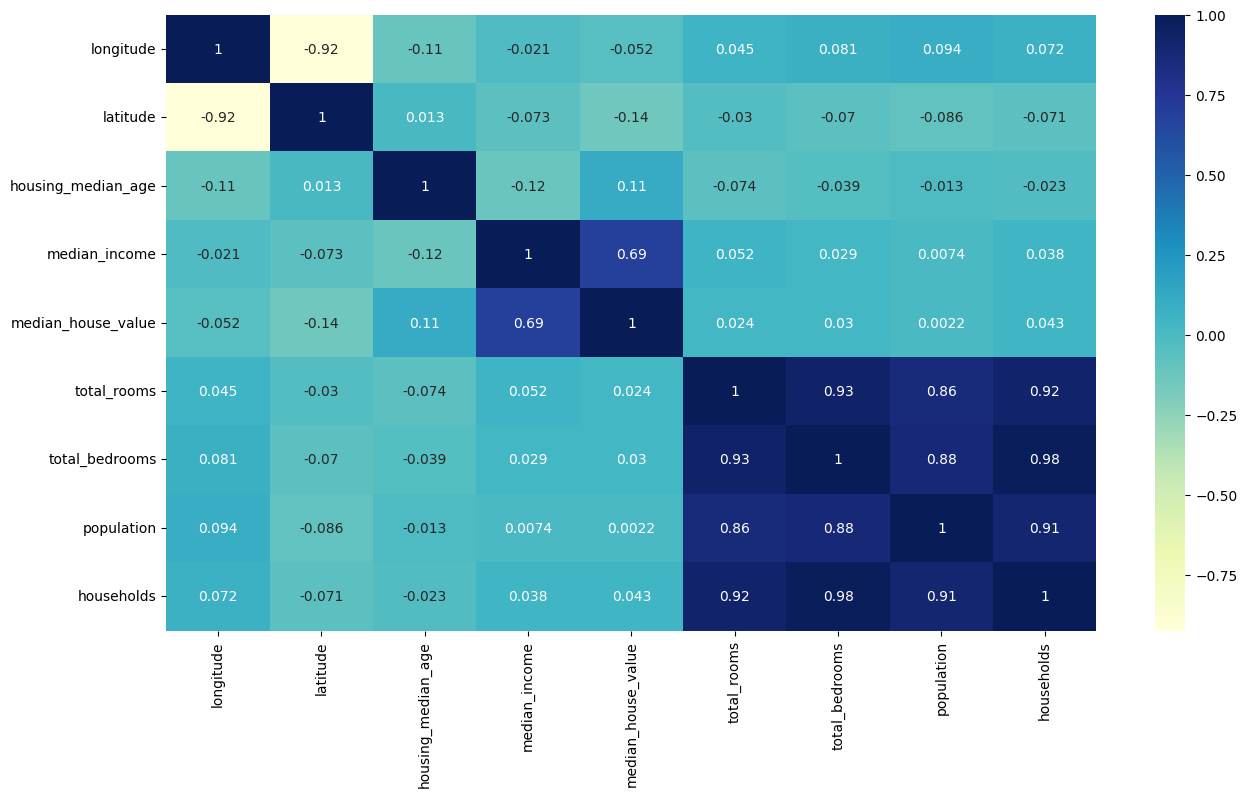

In [66]:
plt.figure(figsize = (15,8))
sns.heatmap(final_data.corr(), annot = True, cmap = 'YlGnBu')

In [67]:
# Training the model with Linear Regression Algorithm
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [71]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
# accuracy of linear regression
reg.score(X_test, y_test)

0.585919259537518

In [72]:
# accuracy of random forest
random_forest.score(X_test, y_test)

0.8016857003111332